# Notebook for testing models and the Pipeline

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from src.LogisticRegression import LogisticRegressionModel
from src.RandomForest import RandomForestModel
from src.GaussianNaiveBayes import GaussianNaiveBayesModel
from src.HIDRAModel import HIDRAModel

from src.DataLoader import DataLoader

In [2]:
data_loader = DataLoader()
apoptotic_data = data_loader.get_apoptotic_drug_dataset_split()
data_example = apoptotic_data["Embelin"]
data_example["train-std"][0].head()

TSPAN6      TNMD      DPM1     SCYL3  C1orf112       FGR  \
Samples                                                                
201T      0.644361 -0.164765 -0.227951  0.862244 -1.353341 -0.142355   
22RV1    -1.012671 -0.024009  0.557893  1.681138 -0.337210 -0.532212   
23132-87 -0.278680  0.268473  1.125973  2.596563 -1.214292 -0.102256   
42-MG-BA  0.204344 -0.537444  0.815336 -1.079712 -1.233022 -0.270366   
451Lu     0.156425 -0.637697 -0.680022 -0.233907  1.307083  0.061252   

               CFH     FUCA2      GCLC      NFYA  ...  LINC00526      PPY2  \
Samples                                           ...                        
201T      0.781191  1.200474  1.507934 -0.065293  ...   0.712984 -1.312003   
22RV1    -0.689357  0.412963  2.229084  0.054048  ...   0.221666 -0.247491   
23132-87 -0.584669  1.241117  0.498333 -1.049678  ...   0.073863  0.316631   
42-MG-BA -0.578184  0.176763 -0.506114 -0.126124  ...  -0.493192 -1.008901   
451Lu    -0.563096  0.526086 -0.809780 -0.475576  ...   0.114585  1.084722   

          Unnamed: 17730  Unnamed: 17731  KRT18P55  Unnamed: 17733  POLRMTP1  \
Samples                                                                        
201T           -1.351741       -0.726863  0.277166       -0.131367 -0.195438   
22RV1           0.392039        0.137774  0.297798       -0.387639  0.140071   
23132-87       -0.034472       -1.800753  0.735474       -0.308708  0.445002   
42-MG-BA       -0.333381       -0.295437 -0.446850       -0.156755  0.868018   
451Lu          -0.293638       -0.320701 -0.896365       -0.212955  0.210264   

            UBL5P2  TBC1D3P5  Unnamed: 17737  
Samples                                       
201T      0.629327  0.145314       -0.147208  
22RV1     0.408703 -0.720533       -0.436715  
23132-87  0.249376  0.693252       -1.212633  
42-MG-BA -1.127736 -1.075401       -0.288052  
451Lu    -0.114349  1.677719       -1.834322  

[5 rows x 17737 columns]

## Normal pipeline with Logistic Regression

In [3]:
# define model
# train model and params on CV-10 and mse
# evaluate model

log_reg = LogisticRegressionModel(model_name="LogReg_testing")
log_reg.train_with_grid_search(data_example["train-std-l1000"][0], data_example["train-std-l1000"][1])
log_reg_eval = log_reg.evaluate(data_example["test-std-l1000"][0], data_example["test-std-l1000"][1])
log_reg_eval

This model was already trained.


ROC_AUC             0.802817
precision           0.142857
recall              0.200000
F1                  0.166667
brier_score_loss    0.083968
accuracy            0.868421
Name: LogReg_testing, dtype: float64

## Normal pipeline with Random Forest

In [4]:
rf = RandomForestModel(model_name="RandomF_testing")
rf.train_with_grid_search(data_example["train-std-l1000"][0], data_example["train-std-l1000"][1])
rf_eval = rf.evaluate(data_example["test-std-l1000"][0], data_example["test-std-l1000"][1])
rf_eval

This model was already trained.


/home/martin/anaconda3/envs/ml-drug/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC_AUC             0.671831
precision           0.000000
recall              0.000000
F1                  0.000000
brier_score_loss    0.060479
accuracy            0.934211
Name: RandomF_testing, dtype: float64

## Normal pipeline with Gaussian Naive Bayes

In [5]:
naive_bayes = GaussianNaiveBayesModel(model_name="GaussNB_testing")
naive_bayes.train_with_grid_search(data_example["train-std-l1000"][0], data_example["train-std-l1000"][1])
naive_bayes_eval = naive_bayes.evaluate(data_example["test-std-l1000"][0], data_example["test-std-l1000"][1])
naive_bayes_eval

This model was already trained.


/home/martin/anaconda3/envs/ml-drug/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])


ROC_AUC             0.500000
precision           0.065789
recall              1.000000
F1                  0.123457
brier_score_loss    0.934211
accuracy            0.065789
Name: GaussNB_testing, dtype: float64

## Normal pipeline with HIDRA model

In [6]:
hidra = HIDRAModel(model_name="HIDRA_testing")
hidra.train_model(data_example["train-std"][0], data_example["train-std"][1])

hidra_eval = hidra.evaluate(data_example["test-std"][0], data_example["test-std"][1])
hidra_eval

2021-12-31 07:35:25.586964: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-31 07:35:25.587077: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-31 07:35:25.588366: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


This model was already trained.


2021-12-31 07:35:32.033118: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-31 07:35:32.085837: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3800045000 Hz
/home/martin/anaconda3/envs/ml-drug/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC_AUC             0.859155
precision           0.000000
recall              0.000000
F1                  0.000000
brier_score_loss    0.059061
accuracy            0.934211
Name: HIDRA_testing, dtype: float64

In [7]:
from sklearn.metrics import roc_curve
eval_data = pd.concat([hidra_eval, log_reg_eval, rf_eval, naive_bayes_eval], axis=1, join="inner")
auc_curves = {
    "LogReg": roc_curve(data_example["test-std-l1000"][1],log_reg.predict_proba(data_example["test-std-l1000"][0])[:,1]),
    "RndForest": roc_curve(data_example["test-std-l1000"][1],rf.predict_proba(data_example["test-std-l1000"][0])[:,1]),
    "NaiveBayes": roc_curve(data_example["test-std-l1000"][1],naive_bayes.predict_proba(data_example["test-std-l1000"][0])[:,1]),
    "HIDRA": roc_curve(data_example["test-std"][1],hidra.predict_proba(data_example["test-std"][0], data_example["test-std"][1])[:,1]),
}

/home/martin/anaconda3/envs/ml-drug/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])


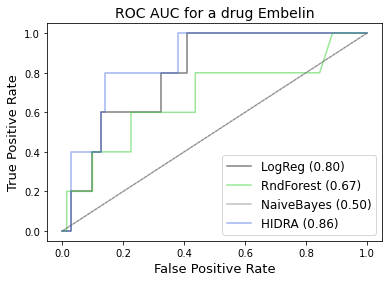

In [8]:
f, ax = plt.subplots(1,1)

ax.plot([0,1], [0,1], "--", lw=0.8, color="gray")

plot_dict = {
    "LogReg": ["black", eval_data.loc["ROC_AUC"]["LogReg_testing"]],
    "RndForest": ["limegreen", eval_data.loc["ROC_AUC"]["RandomF_testing"]],
    "NaiveBayes": ["gray", eval_data.loc["ROC_AUC"]["GaussNB_testing"]],
    "HIDRA": ["royalblue", eval_data.loc["ROC_AUC"]["HIDRA_testing"]]
}

for name, values in auc_curves.items():

    ax.plot(
        values[0], values[1], color=plot_dict[name][0],
        label=f"{name} ({plot_dict[name][1]:.2f})",
        alpha=0.5
    )

ax.legend(fontsize="large")

ax.set_title("ROC AUC for a drug Embelin", fontsize=14)

ax.set_xlabel("False Positive Rate", fontsize=13)
ax.set_ylabel("True Positive Rate", fontsize=13)

f.savefig("figures/roc_auc_Embelin_testing.png", dpi=300)

In [9]:
eval_data

HIDRA_testing  LogReg_testing  RandomF_testing  \
ROC_AUC                0.859155        0.802817         0.671831   
precision              0.000000        0.142857         0.000000   
recall                 0.000000        0.200000         0.000000   
F1                     0.000000        0.166667         0.000000   
brier_score_loss       0.059061        0.083968         0.060479   
accuracy               0.934211        0.868421         0.934211   

                  GaussNB_testing  
ROC_AUC                  0.500000  
precision                0.065789  
recall                   1.000000  
F1                       0.123457  
brier_score_loss         0.934211  
accuracy                 0.065789